In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
import pickle

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/topguns837/Hate-Speech-Detection/main/Datasets/dataset-1/train_E6oV3lV.csv?token=AMMDCH5TQQZSWJCODGLMJODB4A5KA',index_col=0)
data.head(10)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...


In [3]:
data.shape

(31962, 2)

In [4]:
print("+ve : {}".format((len(data[data.label==1])/len(data))*100))
print("-ve : {}".format((len(data[data.label==0])/len(data))*100))

+ve : 7.014579813528565
-ve : 92.98542018647143


In [5]:
print(2*len(data[data.label==1]))

4484


In [6]:
print(data.isnull().sum())

label    0
tweet    0
dtype: int64


In [7]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

In [8]:
data=clean_text(data,"tweet")

In [9]:
data.head(10)

,label,tweet
id,,
1,0,when a father is dysfunctional and is so sel...
2,0,thanks for lyft credit i cant use cause they...
3,0,bihday your majesty
4,0,model i love u take with u all the time in u...
5,0,factsguide society now motivation
6,0,22 huge fan fare and big talking before they l...
7,0,camping tomorrow danny
8,0,the next school year is the year for exams can...
9,0,we won love the land allin cavs champions clev...


In [10]:
data.tail(10)

,label,tweet
id,,
31953,0,you went too far with
31954,0,good morning instagram shower water berlin ber...
31955,0,holiday bull up you will dominate your bull ...
31956,0,less than 2 weeks ibizabringitonmallorcaholi...
31957,0,off fishing tomorrow carnt wait first time in...
31958,0,ate isz that youuu
31959,0,to see nina turner on the airwaves trying to...
31960,0,listening to sad songs on a monday morning otw...
31961,1,sikh temple vandalised in in calgary wso cond...


## Handling imbalanced dataset using RandomUnderSampler

In [11]:
rus = RandomUnderSampler(random_state=0)
X,y=data["tweet"].values.reshape(-1,1),data["label"]
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [12]:
X_resampled.shape

(4484, 1)

In [13]:
train_X=pd.DataFrame(X_resampled)
train_y=pd.DataFrame(y_resampled)

In [14]:
train_X.columns=["tweet"]
train_X.head(10)

,tweet
0,busy day tomorrow yay listings letsgo realtorg...
1,ready to uplevel and sta your dream coaching b...
2,it sure has going to be amazing xxx
3,im really super to watch theconjuring2 today...
4,blown away right now 112000 for yesterday wh...
5,i leave for e3 next tuesday there are so many ...
6,gog pusiste closup i love
7,i think me amp anthony just lost out 27 day st...
8,np susan boyle tracks whilst ironing outside...
9,my warrior in my paper a drawing caoon warrior...


In [15]:
train_y.columns=["label"]
train_y.head(10)

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
if len(train_X)==len(train_y):
    print("success")

success


In [17]:
train_y[train_y.label==1].head(10)

,label
2242,1
2243,1
2244,1
2245,1
2246,1
2247,1
2248,1
2249,1
2250,1
2251,1


In [18]:
data=pd.concat([train_X,train_y],ignore_index=False,axis=1)

In [19]:
data[data.label==1].head(10)


,tweet,label
2242,cnn calls michigan middle school build the wa...,1
2243,no comment in australia opkillingbay seashe...,1
2244,retweet if you agree,1
2245,lumpy says i am a prove it lumpy,1
2246,its unbelievable that in the 21st century wed ...,1
2247,lets fight against love peace,1
2248,the white establishment cant have blk folx run...,1
2249,hey white people you can call people white by...,1
2250,how the altright uses amp insecurity to lure ...,1
2251,im not interested in a linguistics that doesn...,1


## EDA (Exploratory Data Analysis)




### Most used words in hate-speech tweets and non hate-speech tweets

In [20]:
data.columns=["tweet","label"]

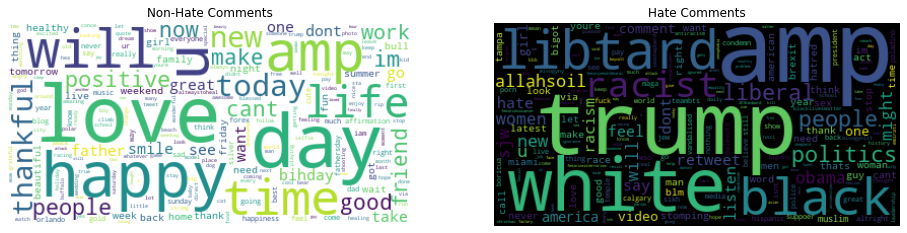

In [21]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(data['tweet'][data.label == 0])
text_neg = " ".join(data['tweet'][data.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

### Trying to find correlation between length of tweet and label

In [22]:
data.head(10)

,tweet,label
0,busy day tomorrow yay listings letsgo realtorg...,0
1,ready to uplevel and sta your dream coaching b...,0
2,it sure has going to be amazing xxx,0
3,im really super to watch theconjuring2 today...,0
4,blown away right now 112000 for yesterday wh...,0
5,i leave for e3 next tuesday there are so many ...,0
6,gog pusiste closup i love,0
7,i think me amp anthony just lost out 27 day st...,0
8,np susan boyle tracks whilst ironing outside...,0
9,my warrior in my paper a drawing caoon warrior...,0


In [23]:
data.tail(10)

,tweet,label
4474,i couldnt end 2016 without mentioning trump f...,1
4475,a follow up from the gentlemen who were kicked...,1
4476,did keep colinpowell and condoleezzarice from...,1
4477,feminismiscancer feminismisterrorism feminism...,1
4478,judd is a amp homophobic freemilo milo freem...,1
4479,lady banned from kentucky mall jcpenny kentu...,1
4480,omfg im offended im a mailbox and im proud m...,1
4481,you dont have the balls to hashtag me as a ...,1
4482,makes you ask yourself who am i then am i any...,1
4483,sikh temple vandalised in in calgary wso cond...,1


In [24]:
data["len"]=0

for index, row in data.iterrows():     
    data.at[index, "len"] = len(row["tweet"])
    

In [25]:
data.head(10)

,tweet,label,len
0,busy day tomorrow yay listings letsgo realtorg...,0,84
1,ready to uplevel and sta your dream coaching b...,0,103
2,it sure has going to be amazing xxx,0,41
3,im really super to watch theconjuring2 today...,0,114
4,blown away right now 112000 for yesterday wh...,0,90
5,i leave for e3 next tuesday there are so many ...,0,86
6,gog pusiste closup i love,0,27
7,i think me amp anthony just lost out 27 day st...,0,52
8,np susan boyle tracks whilst ironing outside...,0,56
9,my warrior in my paper a drawing caoon warrior...,0,95


In [26]:
data.tail(10)

,tweet,label,len
4474,i couldnt end 2016 without mentioning trump f...,1,79
4475,a follow up from the gentlemen who were kicked...,1,94
4476,did keep colinpowell and condoleezzarice from...,1,110
4477,feminismiscancer feminismisterrorism feminism...,1,83
4478,judd is a amp homophobic freemilo milo freem...,1,91
4479,lady banned from kentucky mall jcpenny kentu...,1,51
4480,omfg im offended im a mailbox and im proud m...,1,70
4481,you dont have the balls to hashtag me as a ...,1,96
4482,makes you ask yourself who am i then am i any...,1,78
4483,sikh temple vandalised in in calgary wso cond...,1,57


<AxesSubplot:xlabel='len', ylabel='label'>

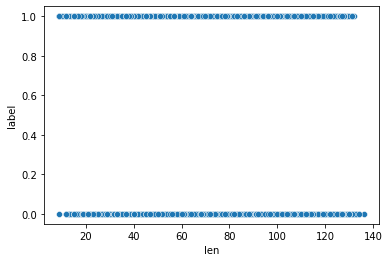

In [27]:
sns.scatterplot(data=data, x="len", y="label")


### Inference : No correlation between length of tweet and its probability of being a hate speech

## Train Test Splitting


In [29]:
train_X,test_X,train_y,test_y=train_test_split(data["tweet"],data["label"])

In [31]:
if len(train_X)==len(train_y):
    print("yes")

yes


## TF-IDF Vectorization

In [103]:
pipeline_logistic = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('lr', LogisticRegression()),])

In [104]:
model = pipeline_logistic.fit(train_X, train_y)

In [105]:
predict_y=model.predict(test_X)

In [106]:
print(predict_y)

[1 1 0 ... 1 0 1]


In [107]:
predict_y=pd.DataFrame(predict_y)

In [108]:
predict_y.columns=["label"]

In [109]:
predict_y.head(10)

,label
0,1
1,1
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,1


In [127]:
test_X=pd.DataFrame(test_X)
test_X.columns=["tweets"]

In [128]:
print(test_X.head(10))

                                                 tweets
3339   if you are hispanic black asian a nonracist w...
3301  no such thing as the lgbt community the most  ...
332   thanking you yin    tranquil amp beautiful  fr...
3611   allahsoil most deaths caused by islamic extre...
2787  come in  fraud amp  documented liar    lost ba...
1083    audjpy fails to resist above 80 yet again ri...
1578                      just got a new oh new phone  
158     todays shootings are an attack against us al...
2245                  lumpy says i am a  prove it lumpy
3852   why is obamalegacy only showing negative stuf...


In [129]:
test=pd.concat([test_X,predict_y])

In [130]:
test.head(10)

,tweets,label
3339,if you are hispanic black asian a nonracist w...,NaN
3301,no such thing as the lgbt community the most ...,NaN
332,thanking you yin tranquil amp beautiful fr...,NaN
3611,allahsoil most deaths caused by islamic extre...,NaN
2787,come in fraud amp documented liar lost ba...,NaN
1083,audjpy fails to resist above 80 yet again ri...,NaN
1578,just got a new oh new phone,NaN
158,todays shootings are an attack against us al...,NaN
2245,lumpy says i am a prove it lumpy,NaN
3852,why is obamalegacy only showing negative stuf...,NaN


In [115]:
print(model.predict(["Good morning"]))

[0]


In [116]:
print(model.predict(["fuck off"]))

[1]


In [117]:
print(model.predict(["I had the fucking best day of my life "]))

[0]


In [118]:
print(model.predict(["You fucking retard"]))

[1]


In [119]:
print(model.predict(["You retard"]))

[0]


In [120]:
print(model.predict(["Go to hell"]))

[0]


In [121]:
print(model.predict(["You fucking libtard"]))

[1]


In [122]:
print(model.predict(["Fuck of bitch"]))

[1]


In [134]:
print(accuracy_score(test_y,predict_y)*100)

85.01338090990187


In [136]:
filename = 'finalized_model_hate_speech.sav'
pickle.dump(model, open(filename, 'wb'))